In [1203]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

%matplotlib inline

for dirname, _, filenames in os.walk('./input/titanic/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/titanic/gender_submission.csv
./input/titanic/test.csv
./input/titanic/train.csv


In [1204]:
train_data = pd.read_csv('./input/titanic/train.csv')

In [1205]:
test_data = pd.read_csv('./input/titanic/test.csv')

In [1206]:
# Temporary concatinate data for analysis
data = pd.concat([train_data, test_data])

In [1207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [1208]:
data.describe(include='O')  # 'O' - object

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [1209]:
# Unique values
data.apply(lambda x: len(x.unique()), axis=0)

PassengerId    1309
Survived          3
Pclass            3
Name           1307
Sex               2
Age              99
SibSp             7
Parch             8
Ticket          929
Fare            282
Cabin           187
Embarked          4
dtype: int64

In [1210]:
data.describe()  # default include=np.number - all number types (float, int)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [1211]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1212]:
# Ratio: Zeros / number of all cells
zeros_ids_train = train_data.apply(lambda x: x.value_counts().get(0, 0), axis=1)
print(f'frequency of zeros in train: {zeros_ids_train.sum()/(train_data.shape[0] * train_data.shape[1]):.3f}')

frequency of zeros in train: 0.173


In [1213]:
# Ratio: Zeros / number of all cells
zeros_ids_test = test_data.apply(lambda x: x.value_counts().get(0, 0), axis=1)
print(f'frequency of zeros in train: {zeros_ids_test.sum()/(test_data.shape[0] * test_data.shape[1]):.3f}')

frequency of zeros in train: 0.132


#### Correlation

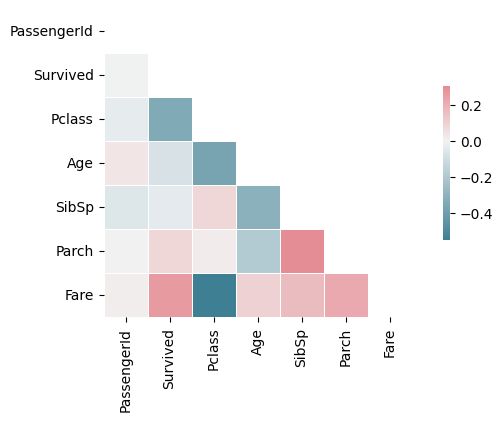

In [1214]:
corr = train_data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 4))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.savefig('./images/titanic/train_corrs.png', dpi=300)

#### comment

In [1215]:
# from sklearn.ensemble import RandomForestClassifier

# y = train_data['Survived']
# features = ['Pclass', 'Sex', 'SibSp', 'Parch']
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])
# model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'gePassengerId': test_data['PassengerId'], 'Survived': predictions})
# output.to_csv('./output/titanic/submission.csv', index=False)
# print('Your submission was successfully saved!')

### Feature Engeeniring

In [1216]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [1217]:
data[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [1218]:
data['Embarked'] = data['Embarked'].fillna('S')
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [1219]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [1220]:
data['FamilySize'] = data['SibSp'] + data['Parch']
data[['FamilySize', 'Survived']].groupby('FamilySize').mean().sort_values(by='FamilySize', ascending=False)

,Survived
FamilySize,
10,0.000000
7,0.000000
6,0.333333
5,0.136364
4,0.200000
3,0.724138
2,0.578431
1,0.552795
0,0.303538


In [1221]:
data['Alone'] = data['FamilySize'] == 0
data[['Alone', 'Survived']].groupby('Alone').mean().sort_values(by='Alone', ascending=False)

,Survived
Alone,
True,0.303538
False,0.505650


In [1222]:
data['Fare'] = data['Fare'].fillna(train_data['Fare'].median())
data['CategoricalFare'] = pd.qcut(train_data['Fare'], 4, precision=0)
data[['CategoricalFare', 'Survived']].groupby('CategoricalFare').mean().sort_values(by='CategoricalFare', ascending=False)

,Survived
CategoricalFare,
"(31.0, 512.0]",0.581081
"(14.0, 31.0]",0.454955
"(8.0, 14.0]",0.303571
"(-1.0, 8.0]",0.197309


In [1223]:
age_mean = data['Age'].mean()
age_std = data['Age'].std()
null_values_count = data['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_mean - age_std, age_mean + age_std, size=null_values_count)

data.loc[np.isnan(data['Age']), 'Age'] = age_null_random_list
data['CategoricalAge'] = pd.cut(train_data['Age'], 5, precision=0)
data[['CategoricalAge', 'Survived']].groupby('CategoricalAge').mean().sort_values(by='CategoricalAge', ascending=False)

,Survived
CategoricalAge,
"(64.0, 80.0]",0.090909
"(48.0, 64.0]",0.434783
"(32.0, 48.0]",0.404255
"(16.0, 32.0]",0.369942
"(0.0, 16.0]",0.550000


In [1224]:
def rightValue(interval):
    return interval.right

In [1225]:
# interval -> extreme value
if data['CategoricalAge'].dtype == 'category':
    data['CategoricalAge'] = data['CategoricalAge'].apply(rightValue)
if data['CategoricalFare'].dtype == 'category':
    data['CategoricalFare'] = data['CategoricalFare'].apply(rightValue)

In [1226]:
data['CategoricalAge'] = pd.to_numeric(data['CategoricalAge'])
data['CategoricalFare'] = pd.to_numeric(data['CategoricalFare'])

In [1227]:
data['CategoricalAge']

0      32.0
1      48.0
2      32.0
3      48.0
4      48.0
       ... 
413     NaN
414    48.0
415     NaN
416    48.0
417    32.0
Name: CategoricalAge, Length: 1309, dtype: float64

In [1228]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,CategoricalFare,CategoricalAge
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,8.0,32.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,512.0,48.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,14.0,32.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,512.0,48.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,14.0,48.0


In [1229]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['CategoricalFare'] = encoder.fit_transform(data['CategoricalFare'])
data['CategoricalAge'] = encoder.fit_transform(data['CategoricalAge'])
data['Alone'] = encoder.fit_transform(data['Alone'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,CategoricalFare,CategoricalAge
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,3,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,3,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1,2


In [1230]:
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc_df = pd.DataFrame(enc.fit_transform(data[['Embarked', 'Sex']]))
# change headers [0, 1, 2 ..] -> names (Embarked_C Embarked_Q Embarked_S Sex_female Sex_male)
enc_df.columns = enc.get_feature_names_out()
data = data.join(enc_df)
data = data.drop(['Embarked', 'Sex'], axis=1)
data.reset_index()

,index,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Alone,CategoricalFare,CategoricalAge,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1,0.0,0.0,1.0,0.0,1.0
1,0,892,NaN,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,1,0.0,0.0,1.0,0.0,1.0
2,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,3,2,1.0,0.0,0.0,1.0,0.0
3,1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1,0,3,2,1.0,0.0,0.0,1.0,0.0
4,2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,1,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,886,887,0.0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,1,1,0.0,0.0,1.0,0.0,1.0
1305,887,888,1.0,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,1,2,1,0.0,0.0,1.0,1.0,0.0
1306,888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",17.0,1,2,W./C. 6607,23.4500,NaN,3,0,2,5,0.0,0.0,1.0,1.0,0.0
1307,889,890,1.0,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,2,1,1.0,0.0,0.0,0.0,1.0


In [1231]:
data = data[data['Survived'].notna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    float64
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Age              891 non-null    float64
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Ticket           891 non-null    object 
 8   Fare             891 non-null    float64
 9   Cabin            204 non-null    object 
 10  FamilySize       891 non-null    int64  
 11  Alone            891 non-null    int64  
 12  CategoricalFare  891 non-null    int64  
 13  CategoricalAge   891 non-null    int64  
 14  Embarked_C       891 non-null    float64
 15  Embarked_Q       891 non-null    float64
 16  Embarked_S       891 non-null    float64
 17  Sex_female      

In [1232]:
# Drop columns
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'FamilySize', 'Age', 'Fare']

if set(drop_elements).issubset(data.columns):
    data.drop(drop_elements, axis=1, inplace=True)

In [1233]:
y = data['Survived']
X = data.drop(['Survived'], axis=1)

#### Models

In [1234]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


classifiers = [
    KNeighborsClassifier(5),
    SVC(probability=True, kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression()
]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

acc_dict = {}

In [1235]:
for clf in classifiers:
    name =clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_valid)
    acc = accuracy_score(y_valid, train_pred)
    
    if name in acc_dict:
        acc_dict[name] +=acc
    else:
        acc_dict[name] = acc

In [1236]:
log_cols = ['Classifier', 'Accuracy']
log = pd.DataFrame(columns=log_cols)

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = pd.concat([log, log_entry])

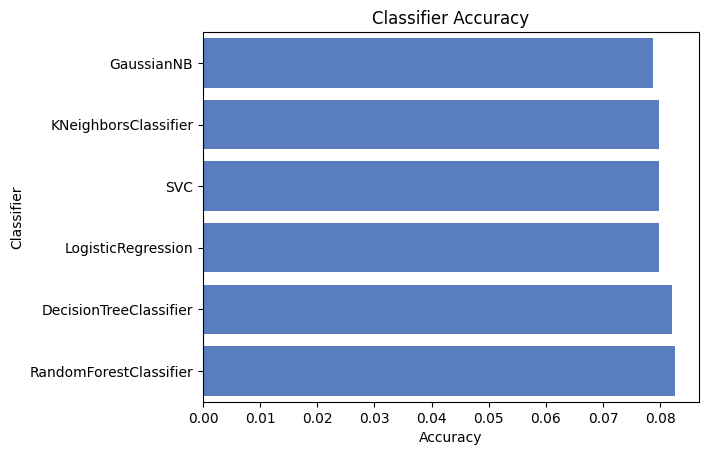

In [1237]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes('muted')
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color='b')
plt.show()

In [1238]:
for clf in classifiers:
    name =clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_valid)
    acc = f1_score(y_valid, train_pred)
    
    if name in acc_dict:
        acc_dict[name] +=acc
    else:
        acc_dict[name] = acc

In [1239]:
log_cols = ['Classifier', 'f1']
log = pd.DataFrame(columns=log_cols)

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = pd.concat([log, log_entry])

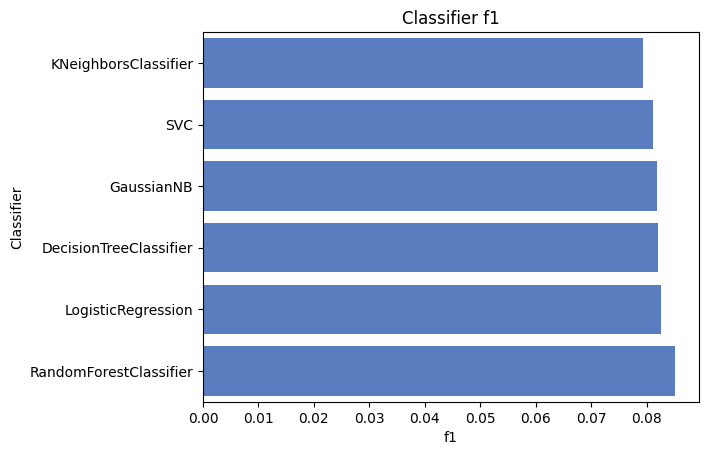

In [1240]:
plt.xlabel('f1')
plt.title('Classifier f1')

sns.set_color_codes('muted')
sns.barplot(x='f1', y='Classifier', data=log.sort_values(by='f1'), color='b')
plt.show()